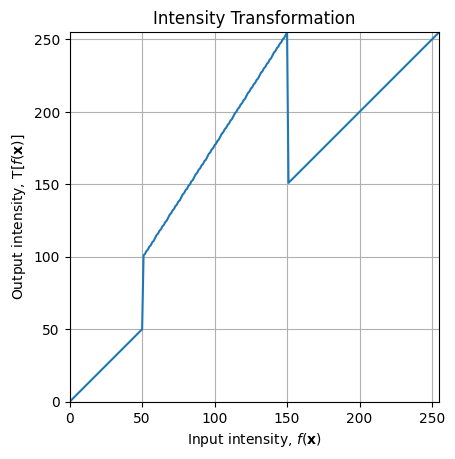

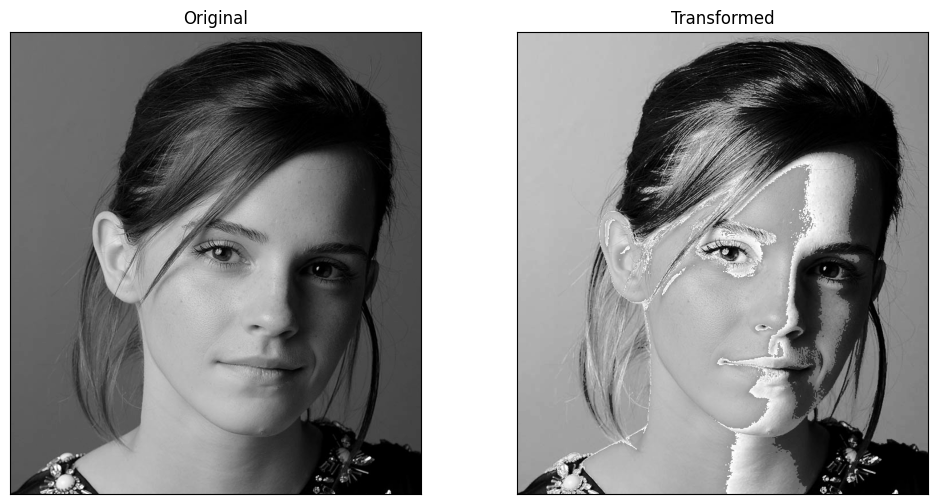

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150,255), (150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.grid()
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_title('Intensity Transformation')
plt.show()
img_orig = cv.imread ('emma.jpg' , cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)
fig, axes = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (12, 6))
axes[0].imshow(img_orig, cmap= 'gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap= 'gray')
axes[1].set_title('Transformed')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

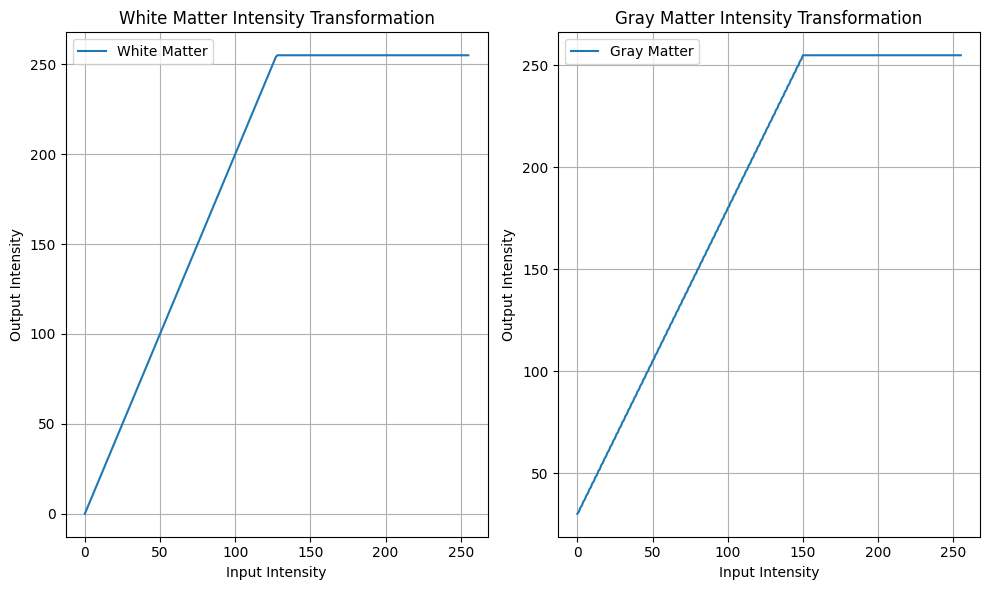

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

def white_matter_transform(x):
    return np.clip(2 * x, 0, 255).astype('uint8')

def gray_matter_transform(x):
    return np.clip(1.5 * x + 30, 0, 255).astype('uint8')

white_matter_indices = np.where((img_orig >= 150) & (img_orig <= 200))
gray_matter_indices = np.where((img_orig >= 50) & (img_orig < 150))

img_transformed = np.zeros_like(img_orig)
img_transformed[white_matter_indices] = white_matter_transform(img_orig[white_matter_indices])
img_transformed[gray_matter_indices] = gray_matter_transform(img_orig[gray_matter_indices])

# Plot the intensity transformations
x = np.arange(256)
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(x, white_matter_transform(x), label='White Matter')
plt.title('White Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, gray_matter_transform(x), label='Gray Matter')
plt.title('Gray Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Display the original and transformed images
cv.namedWindow('Original Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image', img_orig)
cv.waitKey(0)
cv.imshow('Transformed Image', img_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


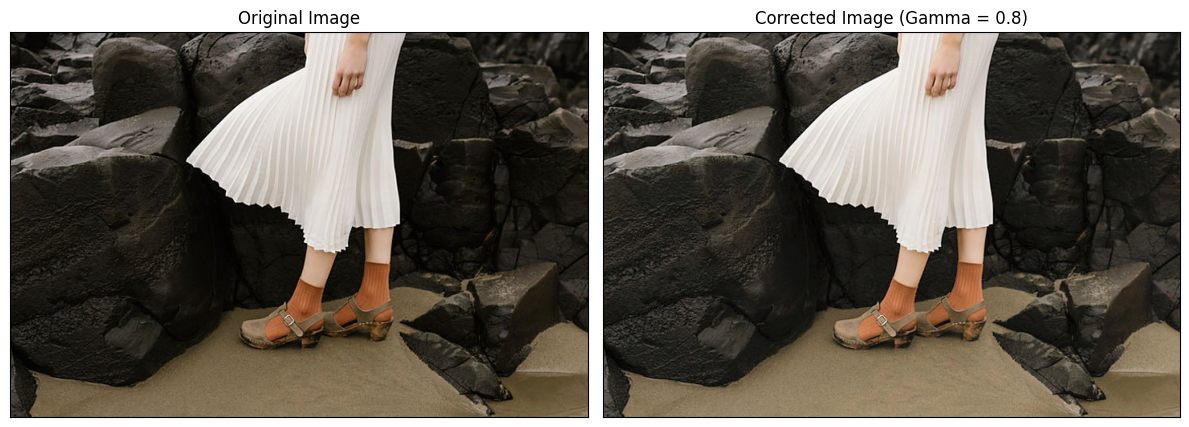

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)

L_channel = img_lab[:, :, 0]

gamma = 0.8

L_corrected = np.power(L_channel / 255.0, gamma) * 255.0
L_corrected = np.clip(L_corrected, 0, 255).astype(np.uint8)

img_lab[:, :, 0] = L_corrected

img_corrected_bgr = cv.cvtColor(img_lab, cv.COLOR_Lab2BGR)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corrected_bgr, cv.COLOR_BGR2RGB))
plt.title(f'Corrected Image (Gamma = {gamma})')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


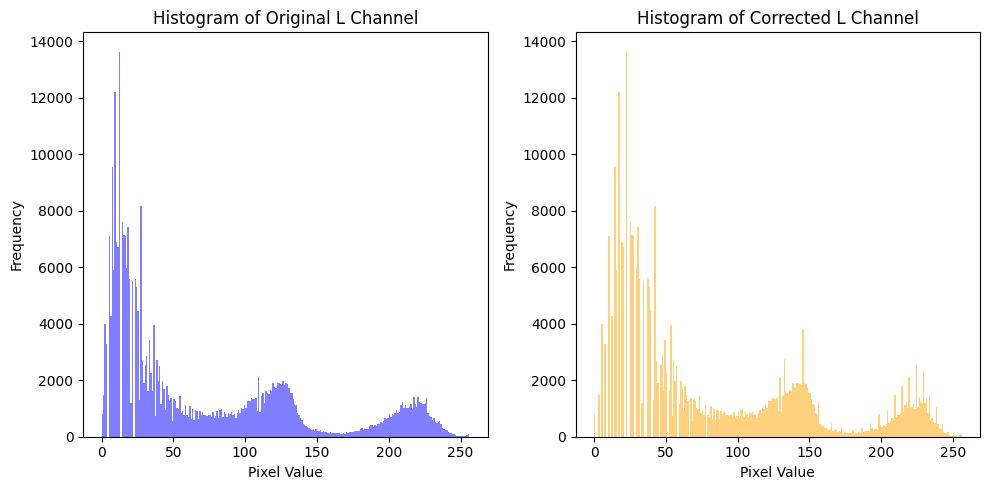

In [8]:
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)

L_channel = img_lab[:, :, 0]

gamma = 0.8 

L_corrected = np.power(L_channel / 255.0, gamma) * 255.0
L_corrected = np.clip(L_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(L_channel.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.5, label='Original L channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Original L Channel')

plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), bins=256, range=[0, 256], color='orange', alpha=0.5, label=f'Corrected L channel (Gamma = {gamma})')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Corrected L Channel')

plt.tight_layout()
plt.show()
